<a href="https://colab.research.google.com/github/Shunian-Chen/AIPI510-Project/blob/main/Food_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI510 Project Food Price Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 1. Data Cleaning

## 1.0 Import Libraries

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### 1.1 Read Data

In [140]:
#Change working directory
PATH = "/content/drive/MyDrive/AIPI510-Project"
os.chdir(PATH)
os.getcwd()

'''
read data into a dictionary
key of the dictionary is the name of dataset
value of the dictionary is the value of that dataset, 
which contains both the date and price
'''
data_path = os.listdir(os.path.join(PATH, "Data"))
data_list = {}
columns = ["close", "value", "dcoilwtico", "usd", "m2"]              #columns that needed for analysis
for path in data_path:
  #read data
  data_path = os.path.join("Data", path)
  data = pd.read_csv(data_path, header = 0)

  #clean the column names
  data.columns = [h.lower().replace(" ", "") for h in data.columns]

  #extract columns needed
  col = ["date"] + data.columns[data.columns.isin(columns)].values.tolist()
  data = data[col]

  #rename the columns
  name = path.split(".")[0]
  data.columns = ["Date", name]

  #transfer datetime
  print(name)
  data["Date"] = pd.to_datetime(data["date"])
  data.set_index("Date", inplace = True)

  #store the data in a dictory
  data_list[name] = data.copy()

Coal


KeyError: ignored

### 1.2 Null Value Processing

#### 1.2.1 Count null values in each feature

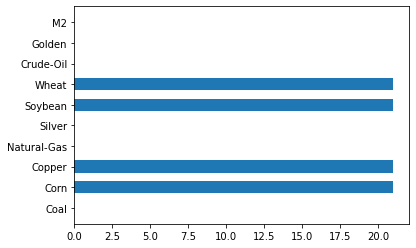

In [133]:
#count null values in each dataframe
null_values = {"feature":[], "No. null":[]}
for key, value in data_list.items():
  null_values["feature"].append(key)
  null_values["No. null"].append(sum(value[key].isna()))
null_values = pd.DataFrame.from_dict(null_values)
#visualize null values
ax = plt.barh(height = 0.6, width = null_values["No. null"], y = null_values["feature"])

#### 1.2.2 See how null values distributed in each feature

In [138]:
nul_col = null_values[null_values['No. null'] != 0]["feature"]
nul_col

1       Corn
2     Copper
5    Soybean
6      Wheat
Name: feature, dtype: object

### 1.3 Outlier Dection

### 1.4 Combine Data From Different Source

### 1.5 Food Price Index Calculation

### 1.6 Data Normalization

### 1.7 Feature Selection

## 2. Model Fitting

## 3. Result Presentation